In [2]:
pip install warning

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


## Importing Modules

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pickle

## Load the dataset into the tool

In [4]:
data=pd.read_csv("heart.csv")

## Split the data into dependent and independent variables

In [5]:
X=data.drop("DEATH_EVENT",axis=1)
Y=data[["DEATH_EVENT"]]

## Split the data into training and testing

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7)

# Build the Model

##  LogisticRegression

In [7]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
model_score=model.score(X_test,Y_test)


### Test the model

In [8]:
print(model_score)

0.8333333333333334


In [9]:
cnf_matrix=metrics.confusion_matrix(Y_test,y_predict)
cnf_matrix

array([[62,  3],
       [12, 13]], dtype=int64)

In [10]:
Accuracy=metrics.accuracy_score(Y_test,y_predict)*100
Precision=metrics.precision_score(Y_test,y_predict)*100
Recall=metrics.recall_score(Y_test,y_predict)*100
print("Testing Accuracy: ",Accuracy)
print("Testing Precision: ",Precision)
print("Testing Recall: ",Recall)

Testing Accuracy:  83.33333333333334
Testing Precision:  81.25
Testing Recall:  52.0


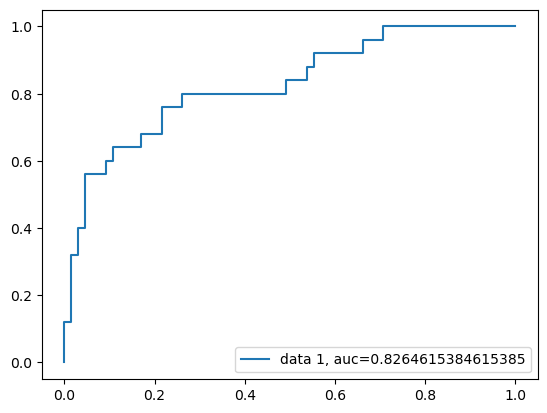

In [11]:
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
lr_pred = model.predict(X_test)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, lr_pred)))

Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 0.16666666666666666
Root Mean Squared Error: 0.408248290463863


### Measure the performance using metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, lr_pred))
print(classification_report(Y_test, lr_pred))

[[62  3]
 [12 13]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        65
           1       0.81      0.52      0.63        25

    accuracy                           0.83        90
   macro avg       0.83      0.74      0.76        90
weighted avg       0.83      0.83      0.82        90



In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   cp                        299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  MaxHR                     299 non-null    int64  
 13  Cholesterol               299 non-null    int64  
 14  DEATH_EVEN

In [16]:
inputFeatures=[75,0,582,0,20,1,265000.00,1.9,130,0,1,0,172,289]
infProb=model.predict_proba([inputFeatures])[0][1]
infProb

0.6934966273324966

## Desision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

68.88888888888889

### Train the Model

In [19]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))

Accuracy on training set: 1.000


### Test the Model

In [20]:
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on test set: 0.689


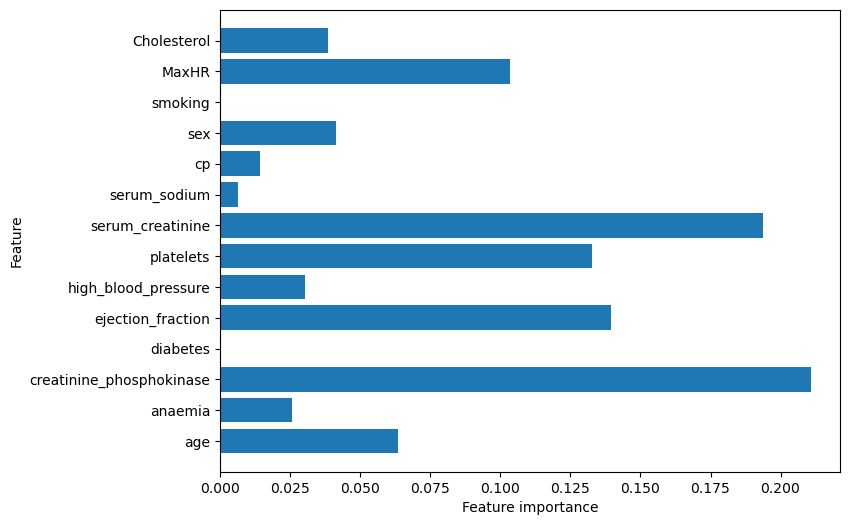

In [21]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 14
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [22]:
y_pred = dt.predict(X_test)

### Measure the performance using Metrics

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[46 19]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        65
           1       0.46      0.64      0.53        25

    accuracy                           0.69        90
   macro avg       0.65      0.67      0.65        90
weighted avg       0.73      0.69      0.70        90



In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.3111111111111111
Mean Squared Error: 0.3111111111111111
Root Mean Squared Error: 0.5577733510227171


# KNeighborsClassifier

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [28]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100

### Train the Model

In [29]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, Y_train)))

Accuracy on training set: 0.660


### Test the Model

In [30]:
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, Y_test)))

Accuracy on test set: 0.722


### Comparison of Algorithms

In [31]:
algos=['Logistic Regression','Decision Tree','KNN']
scores=[Accuracy,accuracy_dt,accuracy_knn]

<BarContainer object of 3 artists>

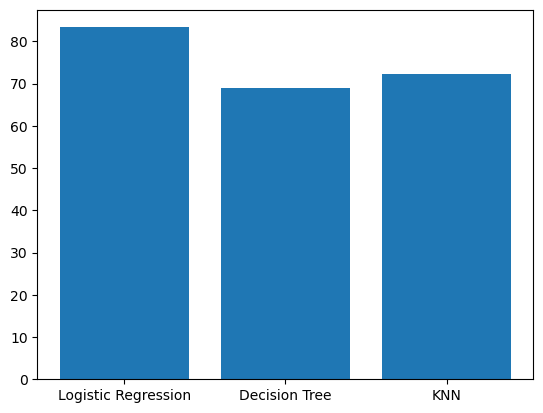

In [32]:
plt.bar(algos,scores)

In [33]:
pickle.dump(model, open('model.pkl', 'wb'))

In [35]:
print('charles makokha')

charles makokha
